In [1]:
import numpy as np # linear algebra
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/motorimagery/IRF.npy
/kaggle/input/motorimagery/MRF.npy
/kaggle/input/motorimagery/MLF.npy
/kaggle/input/motorimagery/ILF.npy


In [2]:
f1=np.load('/kaggle/input/motorimagery/MLF.npy') # Motor left foot
f2=np.load('/kaggle/input/motorimagery/MRF.npy') # Motor right foot
f3=np.load('/kaggle/input/motorimagery/ILF.npy') # Imagery left foot
f4=np.load('/kaggle/input/motorimagery/IRF.npy') # Imagery right foor

In [3]:
labels=['Right foot','Left foot']

In [4]:
Features = np.concatenate((f1, f2)) # left and right motor foot EEG (processed and features extracted)
Features.shape

(456, 1121)

In [5]:
TFeatures = np.concatenate((f3, f4)) # left and right imagery foot EEG (processed and features extracted)
TFeatures.shape

(456, 1121)

## Create labels 
- **Left foot: -1**
- **Right foot: 1**

In [6]:
array1=np.full((228,1),-1)
array2=np.full((228,1),1)
meraged_array=np.concatenate((array1,array2))
meraged_array.shape

(456, 1)

In [7]:
X = Features
y = meraged_array

## Split the dataset into training and testing sets
- **70% training**
- **30% Testing**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest Classifier

In [9]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
y_train = y_train.ravel()
# Fit the model on the training data
rf_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 0.95


## Classification Report

In [10]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.90      0.95        73
           1       0.90      1.00      0.95        64

    accuracy                           0.95       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



## Confusion Matrix

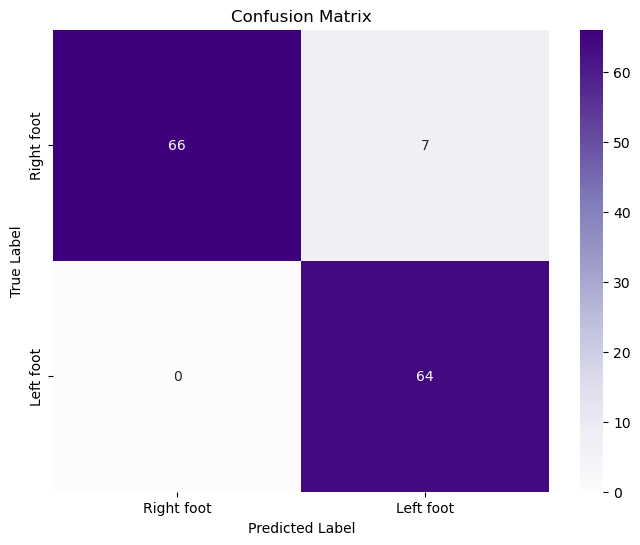

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()